### 1. Import Library

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from ast import literal_eval # For safely converting stringified lists

### 2. Data Understanding

##### 2.1 Data Loading

In [ ]:
df=pd.read_csv('data\TMDB_movie_dataset_va1.csv')

#### 2.2 Exploratory Data Analysis

##### 2.2.1 EDA - Deksripsi Varibael

In [83]:
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [84]:
df.tail()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
1190646,759363,Le Café liégeois,0.0,0,Released,1963-12-31,0,0,False,NaN,...,Le Café liégeois,NaN,0.603,/snFSpXG53hitkhUDvr56iwj46wJ.jpg,NaN,Comedy,Radio-Télévision Française,France,French,sketch
1190647,759365,In the Shadow It Waits,0.0,0,Released,2020-07-04,0,43,False,NaN,...,In the Shadow It Waits,In The Shadow It Waits is a psychological horr...,0.600,NaN,NaN,Horror,NaN,Australia,NaN,NaN
1190648,759367,Spotlight on the Colonies,0.0,0,Released,1950-04-10,0,11,False,NaN,...,Spotlight on the Colonies,Spotlight on the Colonies places particular em...,0.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1190649,759370,MGH 5126,0.0,0,Released,NaN,0,2,False,NaN,...,MGH 5126,Amateur footage of Malaya,0.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1190650,1446785,The Princess of Happy Chance,0.0,0,Released,1916-09-01,0,0,False,NaN,...,The Princess of Happy Chance,A princess avoids a forced marriage by changin...,0.600,NaN,NaN,NaN,London Films Productions,United Kingdom,NaN,NaN


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190651 entries, 0 to 1190650
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1190651 non-null  int64  
 1   title                 1190638 non-null  object 
 2   vote_average          1190651 non-null  float64
 3   vote_count            1190651 non-null  int64  
 4   status                1190651 non-null  object 
 5   release_date          980486 non-null   object 
 6   revenue               1190651 non-null  int64  
 7   runtime               1190651 non-null  int64  
 8   adult                 1190651 non-null  bool   
 9   backdrop_path         312118 non-null   object 
 10  budget                1190651 non-null  int64  
 11  homepage              125344 non-null   object 
 12  imdb_id               615552 non-null   object 
 13  original_language     1190651 non-null  object 
 14  original_title        1190638 non-

In [86]:
df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,1.190651e+06,1.190651e+06,1.190651e+06,1.190651e+06,1.190651e+06,1.190651e+06,1.190651e+06
mean,7.714197e+05,1.806777e+00,1.801598e+01,6.774234e+05,4.694260e+01,2.624532e+05,1.200849e+00
std,4.117594e+05,2.988527e+00,3.112269e+02,1.837304e+07,6.154153e+01,5.092745e+06,7.415418e+00
min,2.000000e+00,0.000000e+00,0.000000e+00,-1.200000e+01,-2.800000e+01,0.000000e+00,0.000000e+00
25%,4.270220e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01
50%,7.783640e+05,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,6.000000e-01
75%,1.140441e+06,4.400000e+00,1.000000e+00,0.000000e+00,8.800000e+01,0.000000e+00,8.720000e-01
max,1.447116e+06,1.000000e+01,3.449500e+04,5.000000e+09,1.440000e+04,1.000000e+09,2.994357e+03


##### 2.2.2 EDA - Menangani Missing Value dan Menangani Outliers

In [88]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

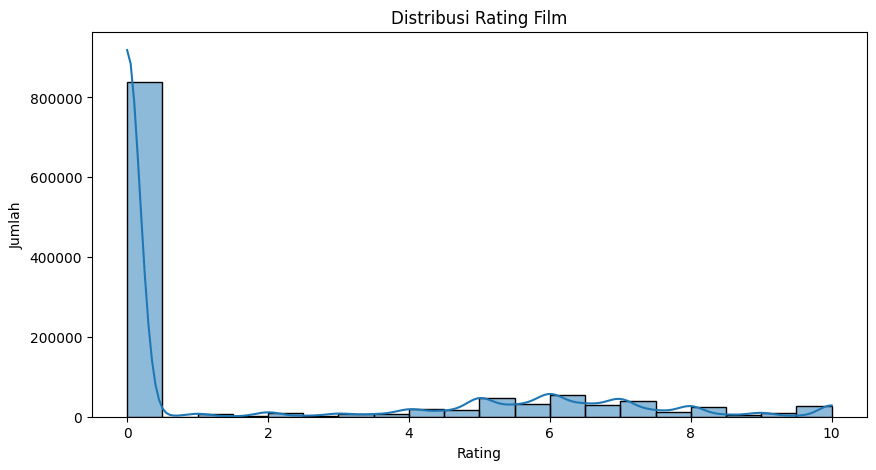

In [89]:

# Visualisasi Distribusi Rating
plt.figure(figsize=(10, 5))
sns.histplot(df['vote_average'], bins=20, kde=True)
plt.title('Distribusi Rating Film')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()


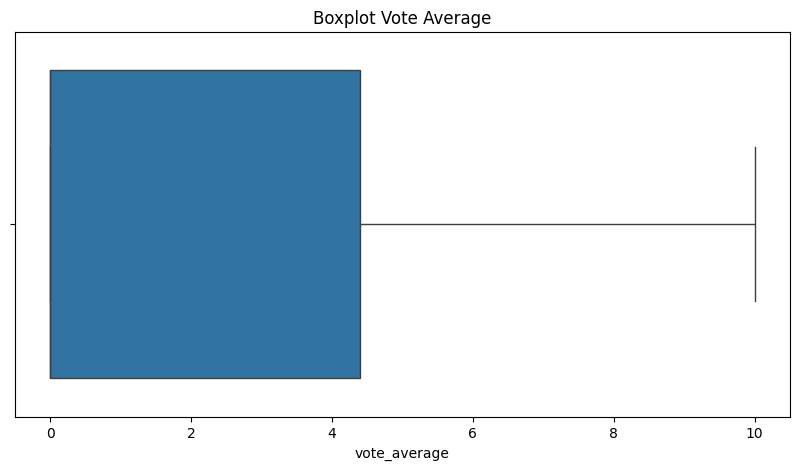

In [90]:
# Boxplot Vote Average
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['vote_average'])
plt.title('Boxplot Vote Average')
plt.show()

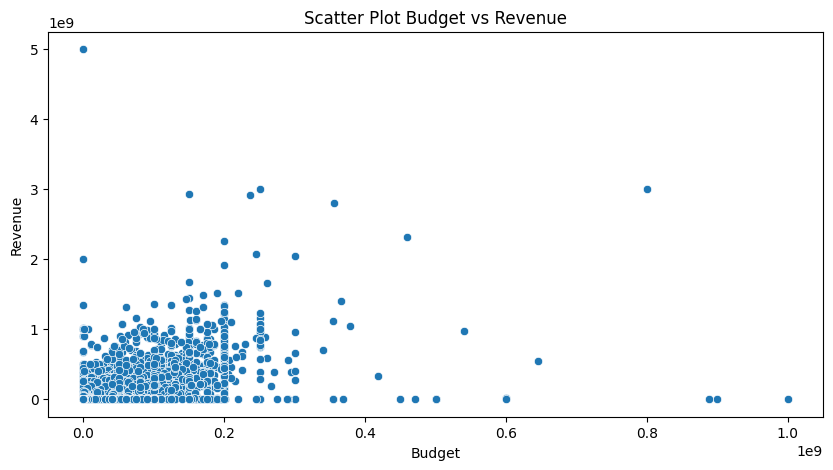

In [91]:
# Scatter Plot Budget vs Revenue
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['budget'], y=df['revenue'])
plt.title('Scatter Plot Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

In [92]:
df.isnull().sum()

id                            0
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             210165
revenue                       0
runtime                       0
adult                         0
backdrop_path            878533
budget                        0
homepage                1065307
imdb_id                  575099
original_language             0
original_title               13
overview                 248755
popularity                    0
poster_path              386015
tagline                 1023888
genres                   486956
production_companies     658939
production_countries     538244
spoken_languages         517887
keywords                 874538
dtype: int64

In [93]:
# Count the number of duplicate rows
df.duplicated().sum()

np.int64(370)

In [94]:
# Find duplicate rows and display them
df[df.duplicated()][:3]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
226307,1199990,The Undead,10.0,1,Released,2023-10-27,0,66,False,NaN,...,The Undead,At the end of times a dysfunctional family tak...,1.4,/jsKHGufgfXgVXuiQ23MK6CtFPvN.jpg,The end is just the beginning,"Horror, Thriller","Bud Rebel Productions, TEGMENTAL",United States of America,NaN,"undead, religion, dead children, religious horror"
233216,1260267,My First Porno 6,6.0,1,Released,2016-12-20,0,157,True,NaN,...,Mi Primer Porno 6,Sasha Jones: New girl for hire! Alice Romain:...,0.0,NaN,NaN,NaN,Culioneros,United States of America,English,european
233259,1260267,My First Porno 6,6.0,1,Released,2016-12-20,0,157,True,NaN,...,Mi Primer Porno 6,Sasha Jones: New girl for hire! Alice Romain:...,0.0,/1Z6EnWTrNmDtJXAhOyRwsmkuvS2.jpg,NaN,NaN,Culioneros,United States of America,English,european


In [95]:
# Remove duplicate rows, keeping the first occurrence
df.drop_duplicates(inplace=True)

#### Content Based Filtering

In [96]:
df['genres'].head()

0             Action, Science Fiction, Adventure
1              Adventure, Drama, Science Fiction
2                 Drama, Action, Crime, Thriller
3    Action, Adventure, Fantasy, Science Fiction
4             Science Fiction, Action, Adventure
Name: genres, dtype: object

In [97]:
df['overview'].head()

0    Cobb, a skilled thief who commits corporate es...
1    The adventures of a group of explorers who mak...
2    Batman raises the stakes in his war on crime. ...
3    In the 22nd century, a paraplegic Marine is di...
4    When an unexpected enemy emerges and threatens...
Name: overview, dtype: object

In [98]:
df['keywords'].head()

0    rescue, mission, dream, airplane, paris, franc...
1    rescue, future, spacecraft, race against time,...
2    joker, sadism, chaos, secret identity, crime f...
3    future, society, culture clash, space travel, ...
4    new york city, superhero, shield, based on com...
Name: keywords, dtype: object

In [99]:
# Download necessary NLTK data (only need to do this once)
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    WordNetLemmatizer().lemmatize('test')
except LookupError:
    nltk.download('wordnet')

# Download WordNet if not already available
try:
    nltk.data.find('corpora/wordnet.zip')
except LookupError:
    nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...


In [100]:
# Preprocessing functions
stop_words = set(stopwords.words('english'))  # Define stop words for text processing
lemmatizer = WordNetLemmatizer()  # Initialize lemmatizer for stemming words to their root form

In [101]:
def remove_stopwords(text):
    """Remove stopwords from a given text."""
    if isinstance(text, str):  # Check if the input is a string
        words = [word for word in text.split() if word.lower() not in stop_words]
        return " ".join(words)  # Join words back into a string
    return ""

def lemmatize_text(text):
    """Lemmatize the words in a given text."""
    if isinstance(text, str):  # Check if the input is a string
        words = [lemmatizer.lemmatize(word) for word in text.split()]
        return " ".join(words)  # Join lemmatized words back into a string
    return ""

In [102]:
def jaccard_similarity(set1, set2):
    """Calculate Jaccard similarity between two sets."""
    intersection = len(set1.intersection(set2))  # Size of intersection
    union = len(set1.union(set2))  # Size of union
    return intersection / union if union != 0 else 0  # Avoid division by zero 

In [103]:
from ast import literal_eval
import numpy as np

def safe_literal_eval(value):
    """Safely evaluate a string to its literal representation."""
    if isinstance(value, str):  # Check if it's a string
        try:
            # Try to evaluate the string as a literal (e.g., list, tuple, dict)
            return literal_eval(value)
        except (ValueError, SyntaxError):
            # If evaluation fails, return the string as a list by splitting on commas
            return value.split(',') if value else []
    elif isinstance(value, float) and np.isnan(value):  # Handle NaN values
        return []  # Return an empty list for NaN values
    elif value is None:  # Handle None explicitly
        return []  # Return an empty list for None
    else:
        return value  # Return the value as-is if it's already in the correct format

# Apply the function to the specified columns
features = ['keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(safe_literal_eval)

In [104]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        return ''
        

# Apply clean_data function to your features.
features = ['keywords', 'genres']

for feature in features:
    df[feature] = df[feature].apply(clean_data)

In [105]:
df = df[:25000]

# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Assuming you already have 'df' as your DataFrame
# Handle missing values in overview and keywords columns
df['overview'] = df['overview'].fillna('')  # Replace NaN in overview
df['keywords'] = df['keywords'].fillna('')  # Replace NaN in keywords

# Feature Extraction
# Create TF-IDF matrix for movie overviews
tfidf_overview = TfidfVectorizer(stop_words='english')
tfidf_overview_matrix = tfidf_overview.fit_transform(df['overview'])

# Convert keywords into strings (if they are lists) and create a TF-IDF matrix for keywords
# Ensure keywords are properly joined into a string for vectorization
keywords_ = [' '.join(keywords) if isinstance(keywords, list) else keywords for keywords in df['keywords']]
vector = CountVectorizer(stop_words='english')
vector_keywords_matrix = vector.fit_transform(keywords_)

# Extract genres and titles as lists for similarity computation
movie_genres = df['genres'].tolist()
movie_titles = df['title'].tolist()

# Calculate cosine similarity for both overview and keywords
cosine_sim_overview = cosine_similarity(tfidf_overview_matrix)
cosine_sim_keywords = cosine_similarity(vector_keywords_matrix)

In [106]:
def combined_similarity(movie1_index, movie2_index, genre_weight=0.2, overview_weight=0.5, keyword_weight=0.3):
    """
    Combine similarity scores from genres, overview, and keywords with adjustable weights.
    """
    genre_sim = jaccard_similarity(set(movie_genres[movie1_index]), set(movie_genres[movie2_index]))  # Jaccard similarity for genres
    overview_sim = cosine_sim_overview[movie1_index, movie2_index]  # Cosine similarity for overviews
    keyword_sim = cosine_sim_keywords[movie1_index, movie2_index]  # Cosine similarity for keywords
    return (genre_weight * genre_sim) + (overview_weight * overview_sim) + (keyword_weight * keyword_sim)  # Weighted sum of similarities

In [107]:
def get_recommendations(movie_title, top_n=10):
    """
    Get top N recommendations for a given movie title based on combined similarity scores.
    """
    # Check if the input is a string
    if not isinstance(movie_title, str):
        return "Error: Movie title must be a string."

    try:
        movie_index = movie_titles.index(movie_title)  # Find index of the given movie
    except ValueError:
        return f"Error: '{movie_title}' not found in the dataset."  # Handle case when the movie is not in the dataset
    
    similarities = [(i, combined_similarity(movie_index, i)) for i in range(len(movie_titles)) if i != movie_index]  # Calculate similarity for all other movies
    similarities.sort(key=lambda x: x[1], reverse=True)  # Sort movies by similarity score in descending order
    
    print(f"\nRecommendations for '{movie_title}':")
    for i, (movie, sim) in enumerate(similarities[:top_n], 1):
        print(f"{i}. Movie: {movie_titles[movie]}, Similarity: {sim}")

In [108]:
# Example Usage
recommendations = get_recommendations('The Dark Knight Rises')  # Get recommendations for 'The Dark Knight Rises'
print(recommendations)

recommendations = get_recommendations('Non Existent Movie')  # Test with a movie not in the dataset
print(recommendations)

recommendations = get_recommendations(12345)  # Test with a non-string input
print(recommendations)


Recommendations for 'The Dark Knight Rises':
1. Movie: The Dark Knight, Similarity: 0.44368346333481057
2. Movie: Batman Begins, Similarity: 0.33120021554346857
3. Movie: Batman: The Long Halloween, Part One, Similarity: 0.3194568662615187
4. Movie: Batman: The Long Halloween, Part Two, Similarity: 0.2988195857420237
5. Movie: Batman vs. Two-Face, Similarity: 0.2820306561934175
6. Movie: The Siege, Similarity: 0.2548354801131165
7. Movie: The Batman, Similarity: 0.2523843852685972
8. Movie: Class of 1984, Similarity: 0.2424407963240198
9. Movie: The Negotiator, Similarity: 0.23902348550447486
10. Movie: Double Impact, Similarity: 0.23857347915230573
None
Error: 'Non Existent Movie' not found in the dataset.
Error: Movie title must be a string.


Total rows and columns: (1190651, 24)
Missing values:
 id                            0
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             210165
revenue                       0
runtime                       0
adult                         0
backdrop_path            878533
budget                        0
homepage                1065307
imdb_id                  575099
original_language             0
original_title               13
overview                 248755
popularity                    0
poster_path              386015
tagline                 1023888
genres                   486956
production_companies     658939
production_countries     538244
spoken_languages         517887
keywords                 874538
dtype: int64
Duplicate entries: 370


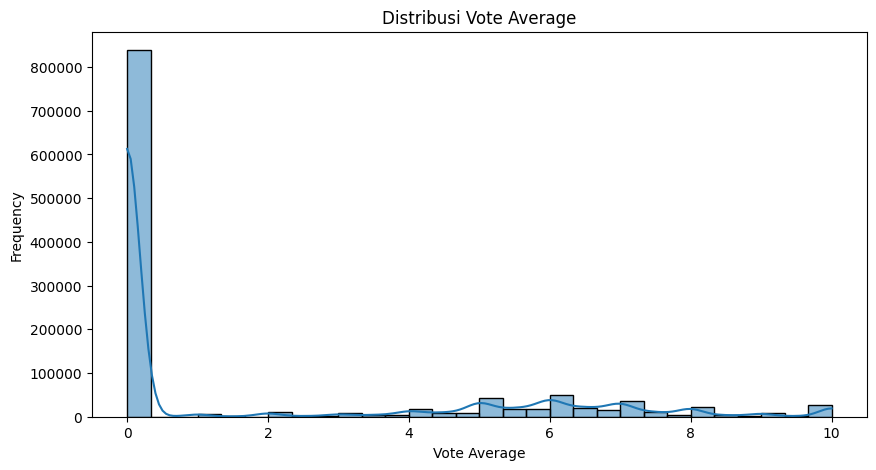

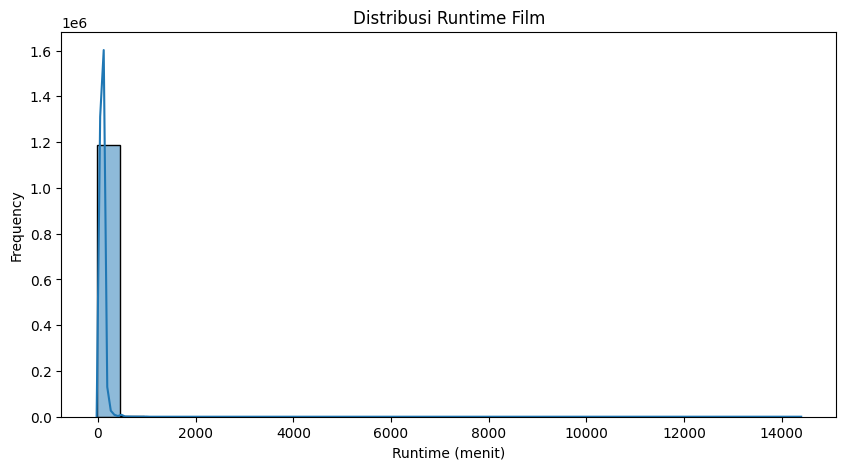

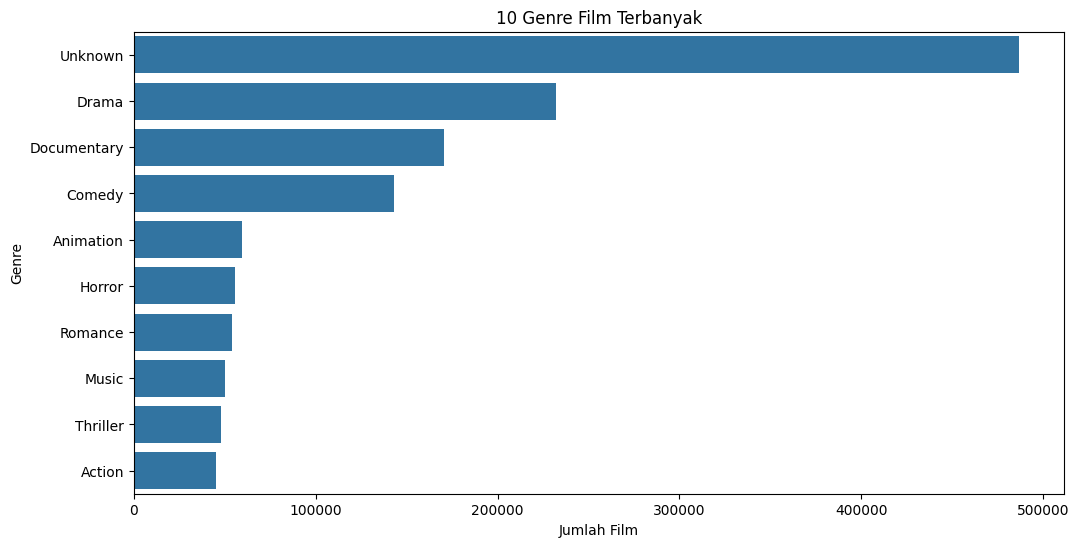

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load Data
# Membaca dataset yang berisi informasi film
df = pd.read_csv("data\TMDB_movie_dataset_v11.csv")

# Data Understanding
print("Total rows and columns:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("Duplicate entries:", df.duplicated().sum())

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 5))
sns.histplot(df['vote_average'].dropna(), bins=30, kde=True)
plt.title('Distribusi Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['runtime'].dropna(), bins=30, kde=True)
plt.title('Distribusi Runtime Film')
plt.xlabel('Runtime (menit)')
plt.ylabel('Frequency')
plt.show()

# Visualisasi genre populer
df['genres'] = df['genres'].fillna('Unknown')
genre_counts = df['genres'].str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('10 Genre Film Terbanyak')
plt.xlabel('Jumlah Film')
plt.ylabel('Genre')
plt.show()

# Data Preparation
df = df.drop_duplicates()
df['overview'] = df['overview'].fillna('')
df['keywords'] = df['keywords'].fillna('Unknown')
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['overview'] = df['overview'].str.lower()
df['keywords'] = df['keywords'].str.lower()

df['combined_features'] = df['overview'] + ' ' + df['genres'] + ' ' + df['keywords']

# Feature Extraction
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['combined_features'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Content-Based Filtering
def get_recommendations(title, cosine_sim=cosine_sim):
    if title not in df['title'].values:
        print(f"Film '{title}' tidak ditemukan dalam dataset.")
        return pd.DataFrame()
    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = np.argsort([score[1] for score in sim_scores])[::-1][1:11]
    return df.iloc[movie_indices][['title', 'vote_average', 'genres']]

# Collaborative Filtering (Placeholder for Implementation)
# Implementasi Collaborative Filtering menggunakan pendekatan lain dapat dimasukkan di sini.

# Evaluation
def precision_at_k(recommended, relevant, k=10):
    relevant_set = set(relevant)
    recommended_set = set(recommended[:k])
    return len(recommended_set & relevant_set) / k

def mean_average_precision_at_k(recommended_list, relevant_list, k=10):
    average_precisions = []
    for recommended, relevant in zip(recommended_list, relevant_list):
        precisions = [precision_at_k(recommended, relevant, k=i + 1) for i in range(k)]
        average_precisions.append(np.mean(precisions))
    return np.mean(average_precisions)

# Contoh Evaluasi
user_watched = ["Inception"]
recommended = get_recommendations("Inception")['title'].tolist()
relevant_movies = df[df['genres'].str.contains("Science Fiction")]['title'].tolist()
precision = precision_at_k(recommended, relevant_movies)
map_k = mean_average_precision_at_k([recommended], [relevant_movies])

print(f'Precision@10: {precision:.4f}')
print(f'MAP@10: {map_k:.4f}')


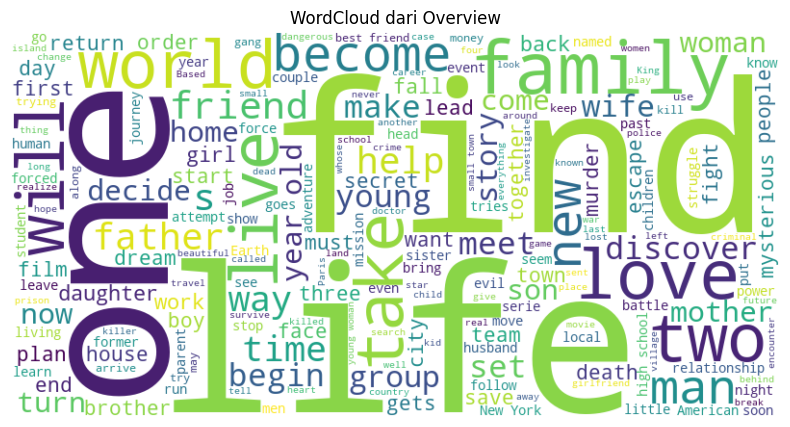

In [109]:
# WordCloud dari Overview
text = ' '.join(df['overview'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud dari Overview")
plt.show()

##### 2.2.3 EDA - Univariate Analysis

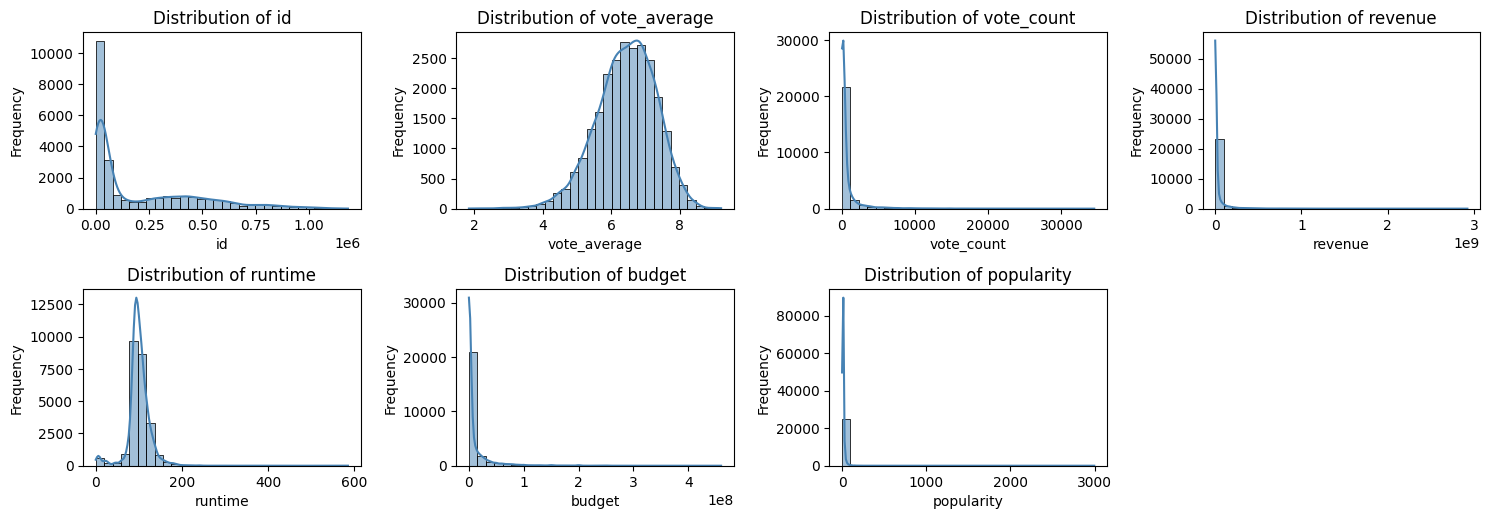

ValueError: Could not interpret value `Gender` for `x`. An entry with this name does not appear in `data`.

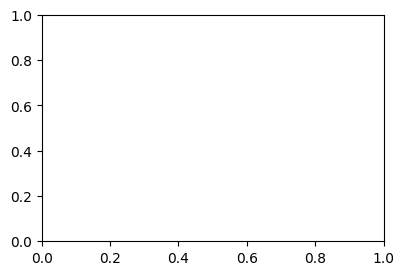

In [110]:
# 2.1 Univariate Analysis
# -------------------------
# Visualisasi distribusi variabel numerik dengan histogram
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], bins=30, kde=True, color='steelblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Visualisasi count plot untuk variabel kategorikal
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
            'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue=col, data=df, palette="viridis")
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()



In [ ]:
df['title'].isnull().sum()

np.int64(13)

In [ ]:
df = df.dropna(subset=['title'])

In [ ]:
df['title'].isnull().sum()

np.int64(0)

In [ ]:
df['title'] = df['title'].str.strip().str.lower().str.replace(' ', '')